# LGBM & XGBM

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Titanic dataset
train_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\machine l\Titanic_train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
 #Check for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


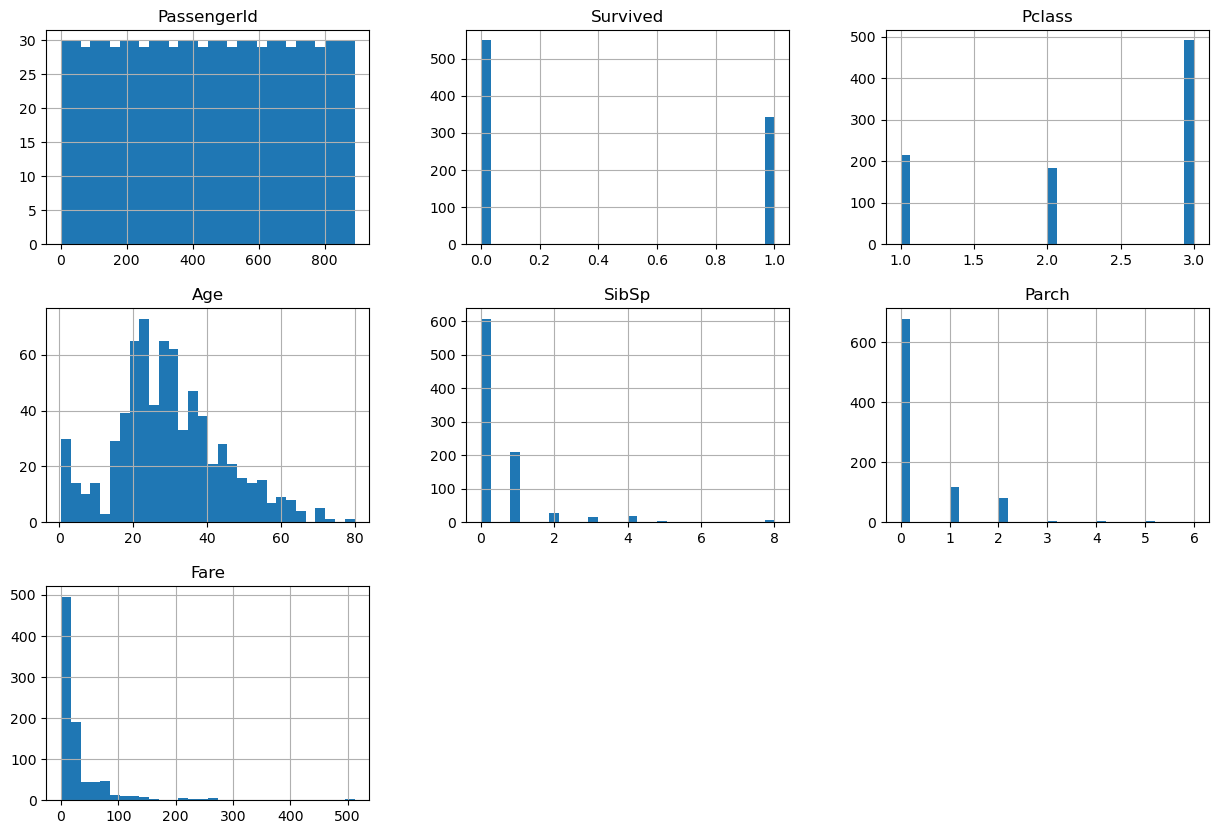

In [11]:
# Explore data distributions
train_data.hist(bins=30, figsize=(15, 10))
plt.show()

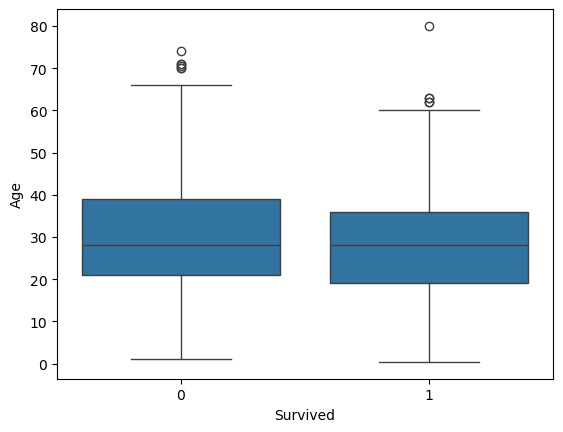

In [13]:
sns.boxplot(data=train_data, x='Survived', y='Age')
plt.show()

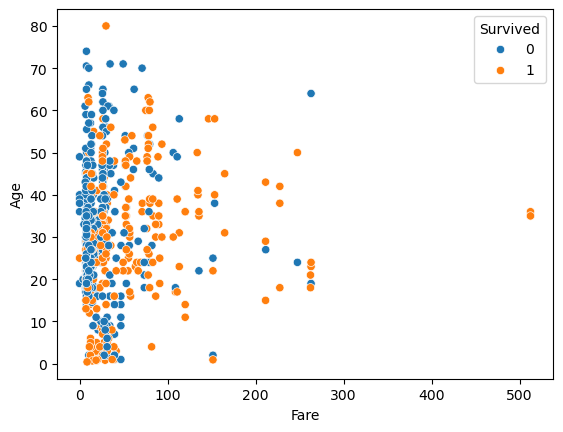

In [15]:
# Visualize relationships between features and survival
sns.scatterplot(data=train_data, x='Fare', y='Age', hue='Survived')
plt.show()

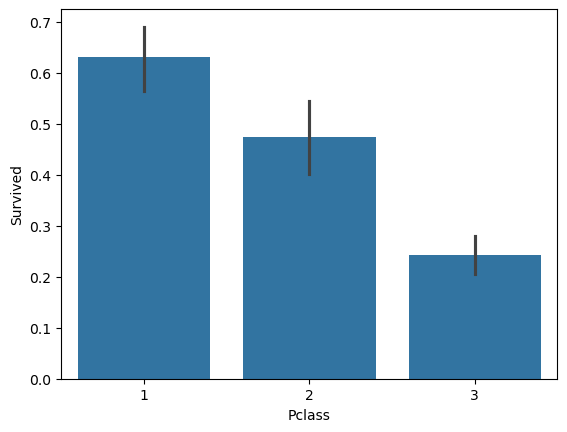

In [17]:
sns.barplot(data=train_data, x='Pclass', y='Survived')
plt.show()

In [77]:
# Impute missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5024\259806737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5024\259806737.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [79]:
# One-Hot Encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,-1,False,True,False,False,True
1,2,1,1,38.000000,1,0,0,True,False,True,False,False
2,3,1,3,26.000000,0,0,-1,True,False,False,False,True
3,4,1,1,35.000000,1,0,1,True,False,False,False,True
4,5,0,3,35.000000,0,0,-1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,-1,False,True,False,False,True
887,888,1,1,19.000000,0,0,145,True,False,False,False,True
888,889,0,3,29.699118,1,2,-1,True,False,False,False,True
889,890,1,1,26.000000,0,0,146,False,True,True,False,False


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Parch', 'SibSp']

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
train_data[numerical_features]

,Age,Parch,SibSp
0,-5.924806e-01,-0.473674,0.432793
1,6.387890e-01,-0.473674,0.432793
2,-2.846632e-01,-0.473674,-0.474545
3,4.079260e-01,-0.473674,0.432793
4,4.079260e-01,-0.473674,-0.474545
...,...,...,...
886,-2.077088e-01,-0.473674,-0.474545
887,-8.233437e-01,-0.473674,-0.474545
888,-2.232906e-16,2.008933,0.432793
889,-2.846632e-01,-0.473674,-0.474545


In [91]:
from sklearn.model_selection import train_test_split

# Features and target
X = train_data.drop(['Survived', 'Cabin'], axis=1)
y = train_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     PassengerId  Pclass           Age     SibSp     Parch  Sex_female  \
 331          332       1  1.215947e+00 -0.474545 -0.473674       False   
 733          734       2 -5.155262e-01 -0.474545 -0.473674       False   
 382          383       3  1.770629e-01 -0.474545 -0.473674       False   
 704          705       3 -2.846632e-01  0.432793 -0.473674       False   
 813          814       3 -1.823750e+00  3.154809  2.008933        True   
 ..           ...     ...           ...       ...       ...         ...   
 106          107       3 -6.694350e-01 -0.474545 -0.473674        True   
 270          271       1 -2.232906e-16 -0.474545 -0.473674       False   
 860          861       3  8.696521e-01  1.340132 -0.473674       False   
 435          436       1 -1.208115e+00  0.432793  2.008933        True   
 102          103       1 -6.694350e-01 -0.474545  0.767630       False   
 
      Sex_male  Embarked_C  Embarked_Q  Embarked_S  
 331      True       False       False       

In [93]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f'LightGBM - Accuracy: {accuracy_lgb:.2f}')
print(f'LightGBM - Precision: {precision_lgb:.2f}')
print(f'LightGBM - Recall: {recall_lgb:.2f}')
print(f'LightGBM - F1-score: {f1_lgb:.2f}')



[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [95]:
import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f'XGBoost - Accuracy: {accuracy_xgb:.2f}')
print(f'XGBoost - Precision: {precision_xgb:.2f}')
print(f'XGBoost - Recall: {recall_xgb:.2f}')
print(f'XGBoost - F1-score: {f1_xgb:.2f}')


XGBoost - Accuracy: 0.78
XGBoost - Precision: 0.74
XGBoost - Recall: 0.72
XGBoost - F1-score: 0.73


In [97]:
# Comparison table
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-score': [f1_lgb, f1_xgb]
})

print(results)


      Model  Accuracy  Precision    Recall  F1-score
0  LightGBM  0.770950   0.726027  0.716216  0.721088
1   XGBoost  0.776536   0.736111  0.716216  0.726027


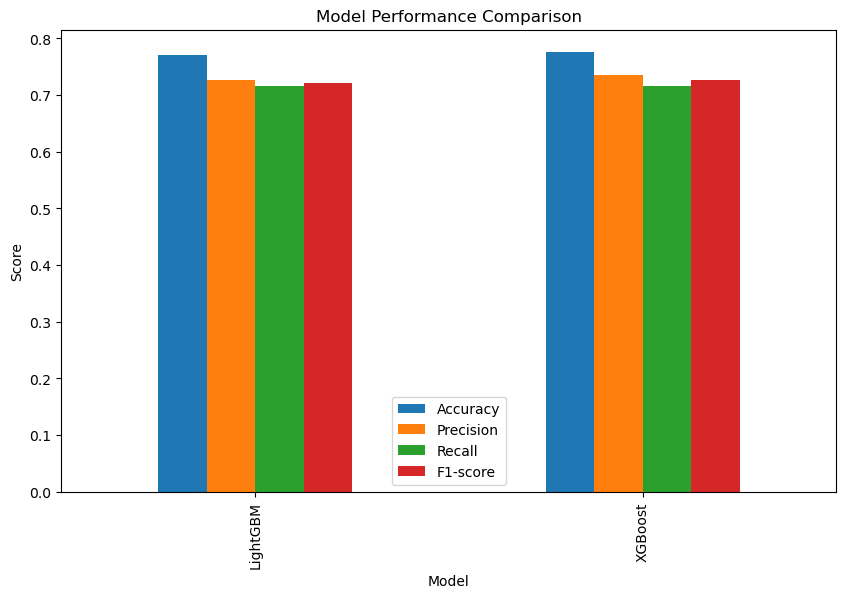

In [99]:
# Visualization
results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()
